In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khada\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\khada\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from textblob import TextBlob
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.sentiment.util import *

In [3]:
trump = pd.read_csv('hashtag_donaldtrump.csv',lineterminator = '\n')
biden = pd.read_csv('hashtag_joebiden.csv',lineterminator = '\n')

In [4]:
trump

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725649,2020-11-05 23:59:59,1.324502e+18,@DavidCornDC #coup by #trump 🎯,2.0,0.0,Twitter for iPhone,1.230104e+18,Debra Weller Olson - “VOTE”,OlsonWeller,2012-14 wkd 3Blocks “S”of #WallSt NYC ”GC”Firm...,...,5654.0,United States,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,2020-11-06 09:50:53.176351
725650,2020-11-05 23:59:59,1.324502e+18,Did you ever speak to someone on public transp...,3.0,2.0,Twitter for Android,2.964605e+07,Stephen Connolly,5Konnolly87,NaN,...,539.0,Drumlane / Portmarnock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-06 09:50:53.272491
725651,2020-11-05 23:59:59,1.324502e+18,So they accepted ballots WAY MORE than three d...,3.0,0.0,Twitter Web App,3.753528e+08,Brian Kennedy,GrowingUpHockey,"Montreal-born, live in Cali. I wrote Growing U...",...,1092.0,Canadian-Californian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-06 09:50:53.108048
725652,2020-11-05 23:59:59,1.324502e+18,#Trump zegt nu gewoon ... 'if you only count m...,6.0,0.0,Twitter Web App,2.902307e+08,Tom Du Bois Vanhoutte 🇧🇪,Du__Bois,"RT&like≠endorse ""#Nationalism eq. #poison, yo...",...,2952.0,@Nottinghill @Antwerp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-06 09:50:53.401021


In [5]:
biden

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499823,2020-11-05 23:59:45,1.324502e+18,Votes get “whittled down”? Counting of mail i...,0.0,0.0,Twitter for iPad,8.059161e+08,Sherry Slater,NS_Slater,"Mom of 4 great kids - hard working, proud Demo...",...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-06 10:04:37.074759
499824,2020-11-05 23:59:47,1.324502e+18,CONTINÚAN SALIENDO LAS PRUEBAS DEL FRAUDE ELEC...,1.0,1.0,Twitter for iPhone,4.805877e+08,Portero Mexico,PorteroMexico,NaN,...,873.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-06 10:04:36.811037
499825,2020-11-05 23:59:50,1.324502e+18,#ElectionResults2020 #USElection #ThursdayThou...,1.0,0.0,Twitter for iPhone,2.265816e+09,VOTE EARLY! ✊🏿✊🏾✊🏽✊🏼✊🏻🏳️‍🌈🇺🇸🗽🌊Biden2020,_lolo173,If my content resonates—follow me. Resist •Pro...,...,140.0,Earth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-06 10:04:37.040510
499826,2020-11-05 23:59:54,1.324502e+18,I wonder who they’re voting for 🤔... - #fyp #f...,0.0,0.0,Instagram,8.317075e+17,NathanKTV,NathanKTV_,💁🏻‍♂️: IG 👉 NathanKTV \n🎥: 👇🏼\nhttps://t.co/o...,...,0.0,"Beverly Hills, CA",34.069650,-118.396306,NaN,United States of America,North America,California,CA,2020-11-06 10:04:36.975515


In [6]:
print(trump.shape)
print(biden.shape)

(725654, 21)
(499828, 21)


In [7]:
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725654 entries, 0 to 725653
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            725654 non-null  object 
 1   tweet_id              725654 non-null  float64
 2   tweet                 725654 non-null  object 
 3   likes                 725654 non-null  float64
 4   retweet_count         725654 non-null  float64
 5   source                724897 non-null  object 
 6   user_id               725654 non-null  float64
 7   user_name             725639 non-null  object 
 8   user_screen_name      725654 non-null  object 
 9   user_description      651481 non-null  object 
 10  user_join_date        725654 non-null  object 
 11  user_followers_count  725654 non-null  float64
 12  user_location         505267 non-null  object 
 13  lat                   342071 non-null  float64
 14  long                  342071 non-null  float64
 15  

In [8]:
trump['candidate'] = 'Trump'

In [9]:
biden['candidate'] = 'Biden'

In [10]:
df = pd.concat([trump,biden])

In [11]:
df

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,Trump
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,Trump
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Trump
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,Trump
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,Trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499823,2020-11-05 23:59:45,1.324502e+18,Votes get “whittled down”? Counting of mail i...,0.0,0.0,Twitter for iPad,8.059161e+08,Sherry Slater,NS_Slater,"Mom of 4 great kids - hard working, proud Demo...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-06 10:04:37.074759,Biden
499824,2020-11-05 23:59:47,1.324502e+18,CONTINÚAN SALIENDO LAS PRUEBAS DEL FRAUDE ELEC...,1.0,1.0,Twitter for iPhone,4.805877e+08,Portero Mexico,PorteroMexico,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-06 10:04:36.811037,Biden
499825,2020-11-05 23:59:50,1.324502e+18,#ElectionResults2020 #USElection #ThursdayThou...,1.0,0.0,Twitter for iPhone,2.265816e+09,VOTE EARLY! ✊🏿✊🏾✊🏽✊🏼✊🏻🏳️‍🌈🇺🇸🗽🌊Biden2020,_lolo173,If my content resonates—follow me. Resist •Pro...,...,Earth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-06 10:04:37.040510,Biden
499826,2020-11-05 23:59:54,1.324502e+18,I wonder who they’re voting for 🤔... - #fyp #f...,0.0,0.0,Instagram,8.317075e+17,NathanKTV,NathanKTV_,💁🏻‍♂️: IG 👉 NathanKTV \n🎥: 👇🏼\nhttps://t.co/o...,...,"Beverly Hills, CA",34.069650,-118.396306,NaN,United States of America,North America,California,CA,2020-11-06 10:04:36.975515,Biden


In [12]:
df.shape

(1225482, 22)

# EDA

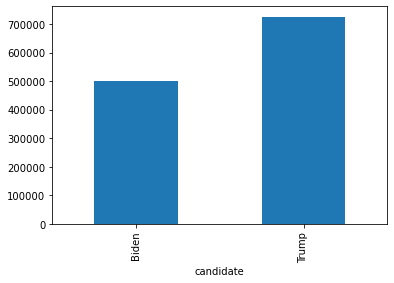

In [13]:
# in visual who have got more number of tweets
df.groupby('candidate')['tweet'].count().plot.bar()

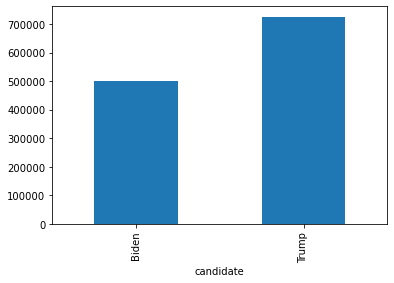

In [14]:
# comparison of likes
df.groupby('candidate')['likes'].count().plot.bar()

In [15]:
df.country.value_counts()

United States of America    262250
United States                50846
United Kingdom               35946
Germany                      23590
France                       22459
                             ...  
Benin                            2
Turks and Caicos Islands         1
Antigua and Barbuda              1
Saint Lucia                      1
Northern Mariana Islands         1
Name: country, Length: 185, dtype: int64

In [16]:
df['country'] = df['country'].replace({'United States of America':'US','United States':'US'})

In [17]:
df.country.value_counts()

US                          313096
United Kingdom               35946
Germany                      23590
France                       22459
India                        21891
                             ...  
South Sudan                      2
Antigua and Barbuda              1
Saint Lucia                      1
Northern Mariana Islands         1
Turks and Caicos Islands         1
Name: country, Length: 184, dtype: int64

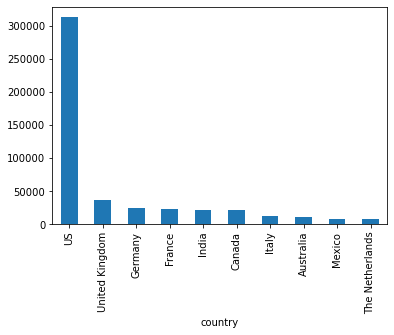

In [18]:
# top 10 countries with highest number of tweets - bar graph
df.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).plot.bar()

In [19]:
# tweets for biden and trump from each country
top10country = df.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()
top10country

['US',
 'United Kingdom',
 'Germany',
 'France',
 'India',
 'Canada',
 'Italy',
 'Australia',
 'Mexico',
 'The Netherlands']

In [20]:
tweet_df = df.groupby(['country','candidate'])['tweet'].count().reset_index()
tweet_df

,country,candidate,tweet
0,Afghanistan,Biden,53
1,Afghanistan,Trump,78
2,Albania,Biden,29
3,Albania,Trump,55
4,Algeria,Biden,9
...,...,...,...
354,Yemen,Trump,78
355,Zambia,Biden,8
356,Zambia,Trump,26
357,Zimbabwe,Biden,33


In [21]:
tweet_df = tweet_df[tweet_df['country'].isin(top10country)]
tweet_df

,country,candidate,tweet
15,Australia,Biden,3601
16,Australia,Trump,6691
52,Canada,Biden,7401
53,Canada,Trump,13320
109,France,Biden,8244
110,France,Trump,14215
115,Germany,Biden,7503
116,Germany,Trump,16087
143,India,Biden,9155
144,India,Trump,12736


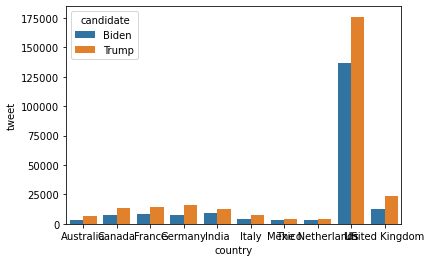

In [22]:
sns.barplot(data=tweet_df,x='country',y='tweet',hue='candidate')

In [23]:
lm= WordNetLemmatizer()

In [24]:
def clean(text):
    text = str(text).lower()
    text = re.sub('[^a-z]',' ',str(text))
    text = text.split()
    text = [lm.lemmatize(j) for j in text if j not in set(stopwords.words('english'))]
    text = ' '.join(str(k) for k in text)
    return text
    
    

In [25]:
# sentiment analysis
trump_tweets = df.query('(candidate=="Trump")').sort_values('user_followers_count',ascending=False).drop_duplicates(['user_id'])[['tweet','country']]

In [26]:
trump_tweets = trump_tweets.loc[trump_tweets.country=='US']

In [27]:
trump_tweets.isnull().sum()

tweet      0
country    0
dtype: int64

In [28]:
trump_tweets['cleantext'] = trump_tweets['tweet'].apply(clean)

In [29]:
trump_tweets

,tweet,country,cleantext
115369,"President Donald #Trump’s youngest daughter, T...",US,president donald trump youngest daughter tiffa...
270220,Woah. Have you read this article?\n\nAll the p...,US,woah read article president debt donald trump ...
661169,#SethMeyers lambastes Fox News for parroting #...,US,sethmeyers lambastes fox news parroting donald...
693531,📌 Las #noticias más importantes de la mañana: ...,US,la noticias importantes de la ana sigue el con...
566989,#Trump Habla en segundos. Todavía nada está de...,US,trump habla en segundos todav nada est definid...
...,...,...,...
205989,About the #fracking comment last night. Is Jo...,US,fracking comment last night joe biden bidenhar...
462011,Dirty Don trying to cheat at the polls. @realD...,US,dirty trying cheat poll realdonaldtrump donald...
68033,The United States shows more DEATHS than other...,US,united state show death country lamestream fak...
228347,#iamvalued #youarevaued #msc #Trump #trump2020...,US,iamvalued youarevaued msc trump trump seat sti...


#### Create function for polarity and subjectivity
#### Subjectivity - if the sentence is subjective or objective -  subjective refers to the personal opinions, emotions or peoples's judgement wheras objectrive refers to factual information.
#### Polarity -  float value lies between[-1,1] where 1 means positive and -1 means negative

In [30]:
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity
def getAnalysis(score):
    if score<0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'
    

In [31]:
trump_tweets['subjectivity'] = trump_tweets['cleantext'].apply(getsubjectivity)

In [32]:
trump_tweets['polarity'] = trump_tweets['cleantext'].apply(getpolarity)

In [33]:
trump_tweets['sentiment'] = trump_tweets['polarity'].apply(getAnalysis)

In [34]:
trump_tweets

,tweet,country,cleantext,subjectivity,polarity,sentiment
115369,"President Donald #Trump’s youngest daughter, T...",US,president donald trump youngest daughter tiffa...,0.000000,0.00,neutral
270220,Woah. Have you read this article?\n\nAll the p...,US,woah read article president debt donald trump ...,0.000000,0.00,neutral
661169,#SethMeyers lambastes Fox News for parroting #...,US,sethmeyers lambastes fox news parroting donald...,0.000000,0.00,neutral
693531,📌 Las #noticias más importantes de la mañana: ...,US,la noticias importantes de la ana sigue el con...,0.000000,0.00,neutral
566989,#Trump Habla en segundos. Todavía nada está de...,US,trump habla en segundos todav nada est definid...,0.000000,0.00,neutral
...,...,...,...,...,...,...
205989,About the #fracking comment last night. Is Jo...,US,fracking comment last night joe biden bidenhar...,0.066667,0.00,neutral
462011,Dirty Don trying to cheat at the polls. @realD...,US,dirty trying cheat poll realdonaldtrump donald...,0.800000,-0.60,negative
68033,The United States shows more DEATHS than other...,US,united state show death country lamestream fak...,0.733333,-0.44,negative
228347,#iamvalued #youarevaued #msc #Trump #trump2020...,US,iamvalued youarevaued msc trump trump seat sti...,0.000000,0.00,neutral


In [35]:
biden_tweets = df.query('(candidate=="Biden")').sort_values('user_followers_count',ascending=False).drop_duplicates(['user_id'])[['tweet','country']]
biden_tweets = biden_tweets.loc[biden_tweets.country=='US']

In [36]:
biden_tweets['cleantext'] = biden_tweets['tweet'].apply(clean)

In [37]:
biden_tweets['polarity'] = biden_tweets['cleantext'].apply(getpolarity)

In [38]:
biden_tweets['subjectivity'] = biden_tweets['cleantext'].apply(getsubjectivity)

In [39]:
biden_tweets['sentiment'] = biden_tweets['polarity'].apply(getAnalysis)

In [40]:
biden_tweets

,tweet,country,cleantext,polarity,subjectivity,sentiment
175650,#JoeBiden is enlisting A-list star power to he...,US,joebiden enlisting list star power help close ...,0.000000,0.000000,neutral
343145,The big fight TODAY!!!!! @realDonaldTrump vs #...,US,big fight today realdonaldtrump v joebiden got...,0.000000,0.100000,neutral
459947,#JimmyKimmel offered his view about how the la...,US,jimmykimmel offered view last day gone close r...,0.000000,0.066667,neutral
493728,Sigue el conteo de votos en #Georgia: #Trump y...,US,sigue el conteo de votos en georgia trump bide...,0.000000,0.000000,neutral
281536,"Are you there, God? It's me again, Bette. We'r...",US,god bette scared fascist whitehouse racist cri...,0.100000,0.562500,positive
...,...,...,...,...,...,...
484098,UNITED WE STAND PEOPLE don’t let the clowns ru...,US,united stand people let clown running presiden...,0.083333,0.541667,positive
67722,"@TheJeffBridges And, I voted for the only hono...",US,thejeffbridges voted honorable man running pre...,0.000000,0.000000,neutral
313770,#2020ElectionPrediction\n\n#Trump wins 300-320...,US,electionprediction trump win electoral vote ma...,0.733333,0.566667,positive
42480,The world is sick and needs a hero. I think #b...,US,world sick need hero think biden way towards s...,-0.714286,0.857143,negative


In [41]:
trump_tweets.sentiment.value_counts(normalize=True)*100

neutral     44.789301
positive    34.625284
negative    20.585415
Name: sentiment, dtype: float64

In [42]:
biden_tweets.sentiment.value_counts(normalize=True)*100

neutral     46.854058
positive    36.827532
negative    16.318410
Name: sentiment, dtype: float64

In [44]:
from wordcloud import WordCloud, STOPWORDS
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(background_color='white',stopwords = stopwords,
                          width=1600,height=800, max_font_size=800,max_words=100).generate(all_words)
    plt.figure(figsize=(12,10))
    plt.axis('off')
    plt.imshow(wordcloud)
    
    

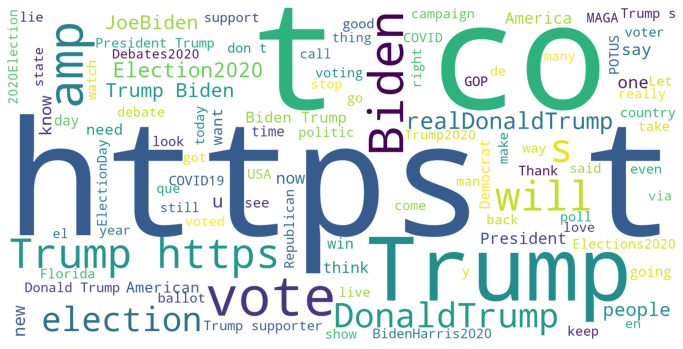

In [45]:
word_cloud(trump_tweets['tweet'][:5000])

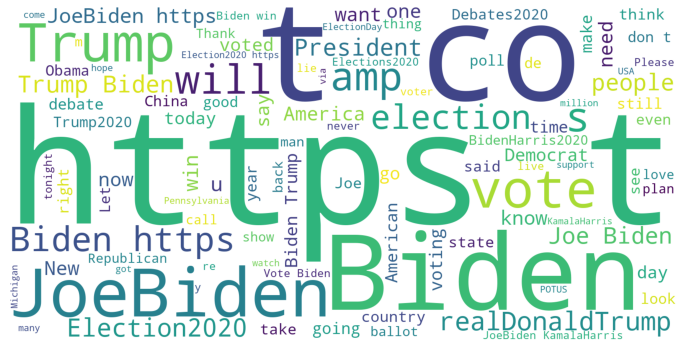

In [46]:
word_cloud(biden_tweets['tweet'][:5000])